# California Housing Dataset: Data Analysis and Modeling

## 1. Data Loading and Overview

The California Housing dataset is loaded from KaggleHub. The dataset contains information on housing attributes collected during the 1990s California census. This includes variables such as median income, total rooms, population, and median house value. Initial data checks include shape, types, and missing value inspection.


In [1]:
# Importing Necessary Libraries
import os
import numpy as np
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

D:\Anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Download latest version
path = kagglehub.dataset_download("camnugent/california-housing-prices")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Owner\.cache\kagglehub\datasets\camnugent\california-housing-prices\versions\1


In [3]:
# The dataset contains a file named 'housing.csv'
# Construct the path to the CSV file
csv_path = os.path.join(path, "housing.csv")

# Load the dataset into a pandas DataFrame
df = pd.read_csv(csv_path)    
df.head()  # Display the first few rows

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

**Variable Descriptions**

The following are the variables in the dataset:
    
1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea

## 2. Exploratory Data Analysis


In [4]:
df.shape

(20640, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [7]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
# Impute missing values in 'total_bedrooms' with median
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

C:\Users\Owner\AppData\Local\Temp\ipykernel_11932\2746114066.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)


In [9]:
# Verify again
print(df.isnull().sum())


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


### 2.1 Univariate Analysis

#### 2.1.1 Distribution of target variable (median_house_value)

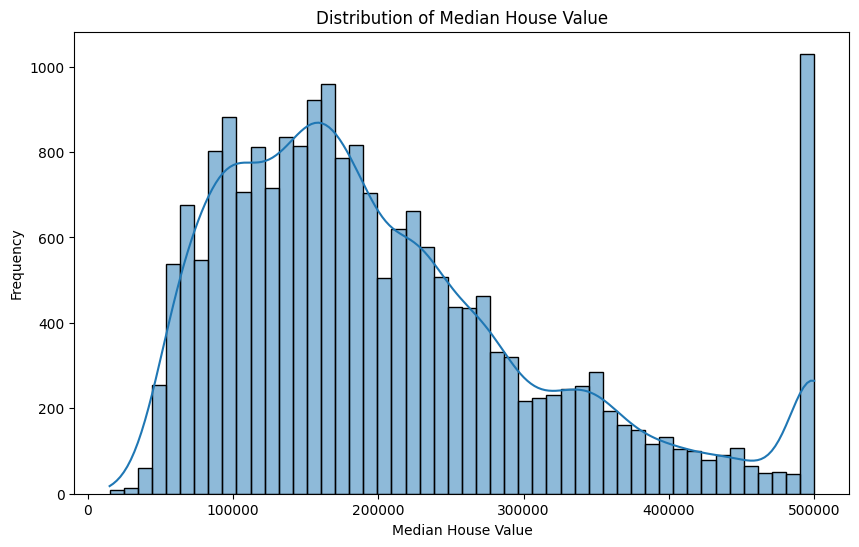

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['median_house_value'], kde=True, bins=50)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

**Observation: Median House Value**
- Most house prices lie between $100,000 and 300,000, indicating a concentration in the mid-range segment.

- A right-skewed distribution is evident, with fewer high-priced properties.

- A sharp peak at $500,000 reveals an upper limit or cap in the dataset.

#### 2.1.2 Histograms for numerical features

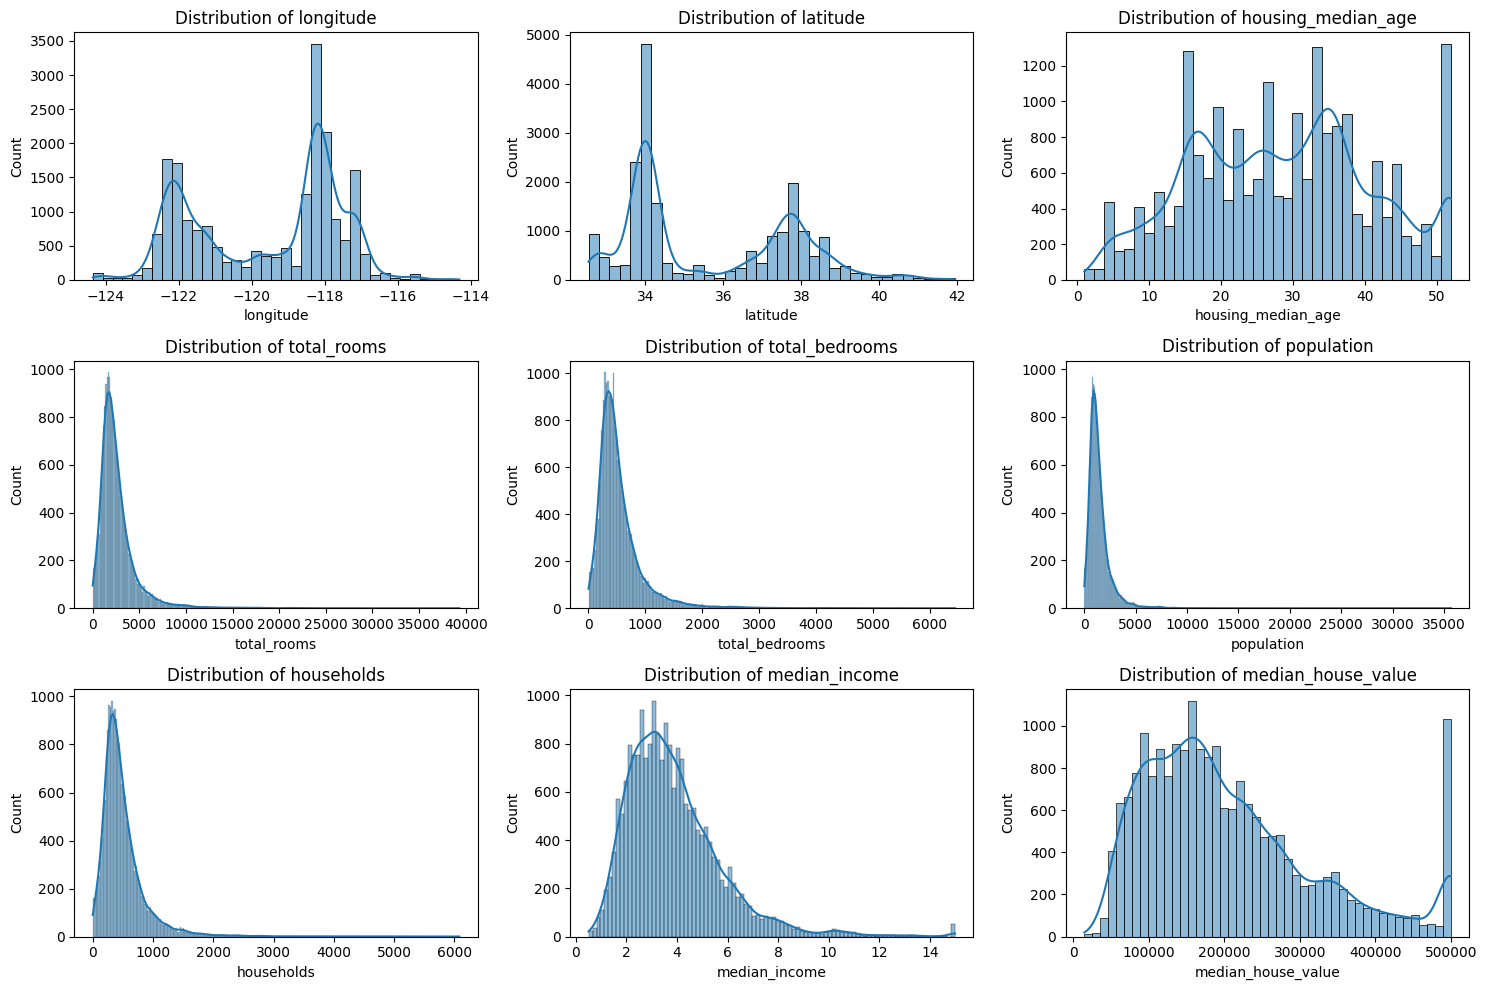

In [11]:
# Histograms for numerical features
numerical_cols= df.select_dtypes(include=['number'])
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()

**Observation: Distribution of Numerical Features**
- Geospatial Variables (longitude, latitude): Show multimodal distributions, reflecting clusters around specific geographic regions (e.g., coastal urban centers).

- Housing Structure (total_rooms, total_bedrooms, population, households): All exhibit strong right-skewness, with a long tail of high values, suggesting the presence of large housing units and high-density areas.

- housing_median_age: Displays a uniform-like spread with peaks at both lower and upper bounds, possibly due to age capping at 50 years.

- median_income: Approximately right-skewed, with most households earning between $2,000 and $6,000 per year (in 1990s dollars).

- median_house_value: Follows a right-skewed pattern with an artificial cap at $500,000, which may truncate variability in upper-value homes.

#### 2.1.3 Box plots for numerical features

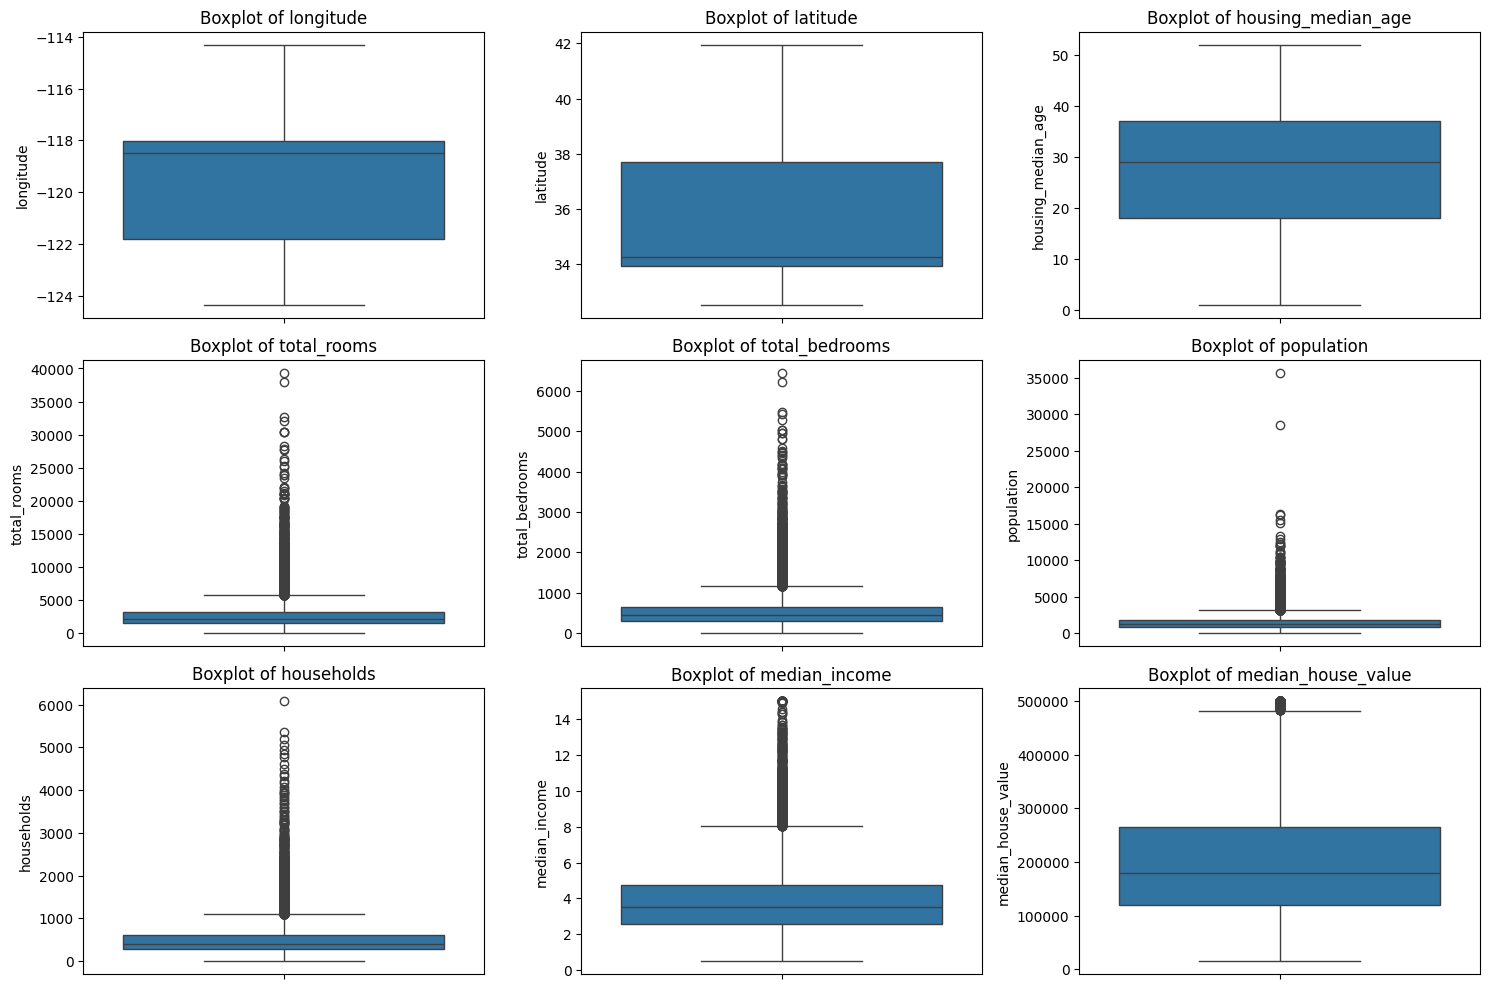

In [12]:
# Box plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col].dropna())
    plt.title(f'Boxplot of {col}')
plt.tight_layout()

**Observation: Boxplots of Numerical Features**

High outliers are present in:

- total_rooms, total_bedrooms, population, and households, indicating extreme variations in housing scale and density.

- median_income also contains notable outliers in the upper range.

The target variable median_house_value shows a sharp cap at $500,000,

longitude, latitude, and housing_median_age are well-behaved without extreme outliers.


#### 2.1.4 Outlier treatment

In [13]:
# Outlier treatments with IQR Capping
num_cols = df.select_dtypes(include=['number'])

for col in num_cols:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

#### 2.1.5 Box plots after fixing outliers

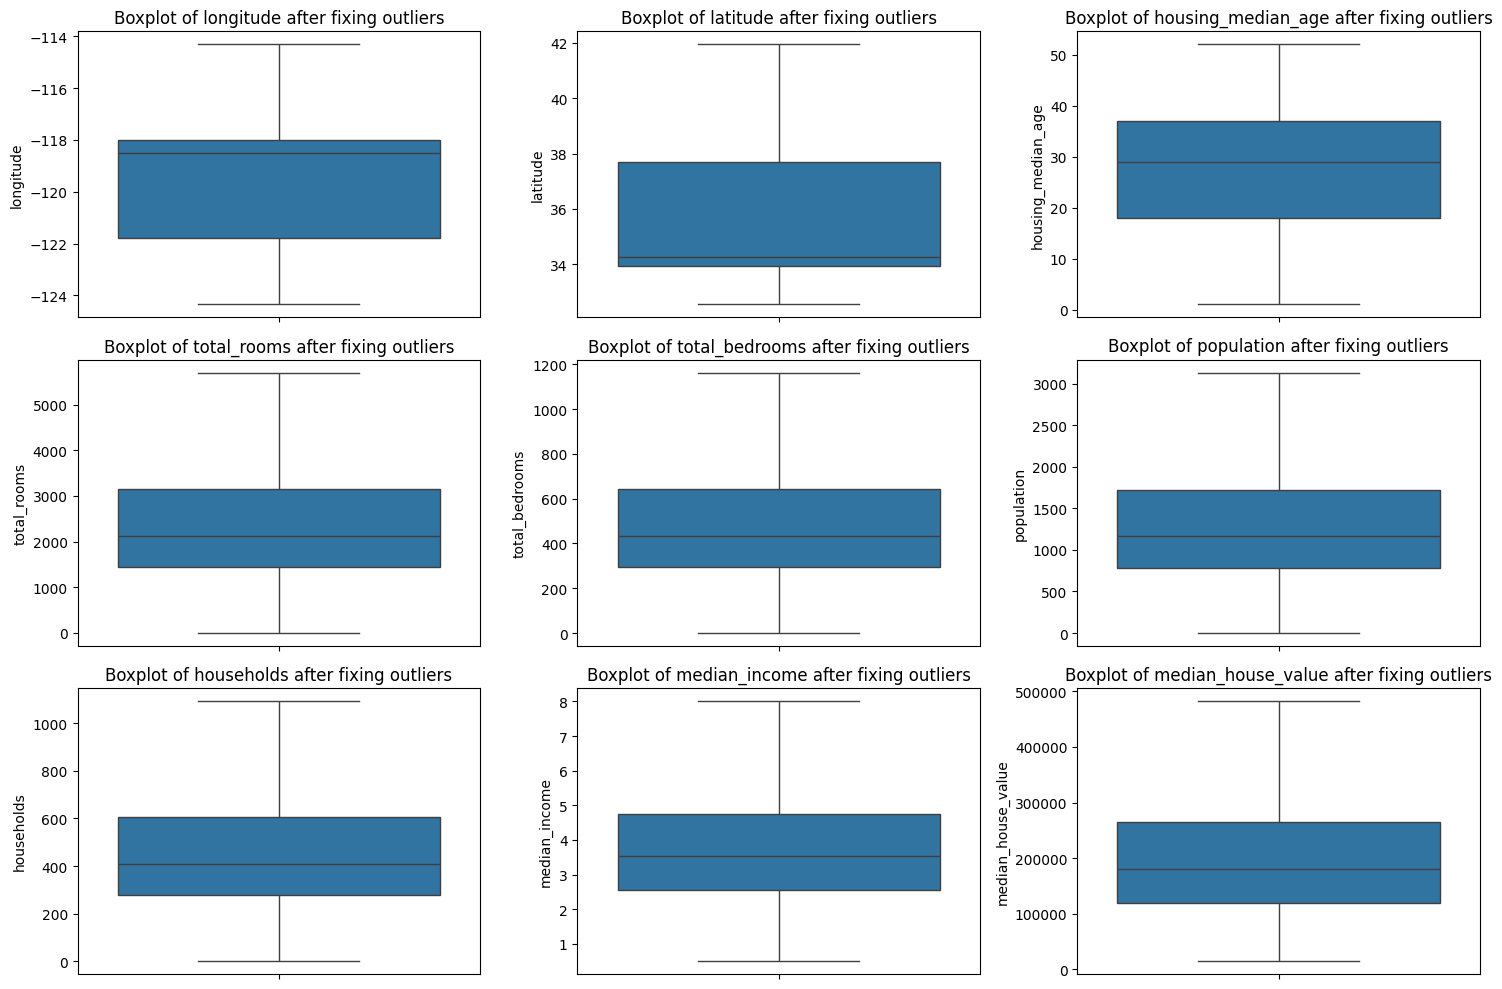

In [14]:
# Box plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col].dropna())
    plt.title(f'Boxplot of {col} after fixing outliers')
plt.tight_layout()

#### 2.1.6 Distribution of Categorical feature 

In [15]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

([0, 1, 2, 3, 4],
 [Text(0, 0, 'NEAR BAY'),
  Text(1, 0, '<1H OCEAN'),
  Text(2, 0, 'INLAND'),
  Text(3, 0, 'NEAR OCEAN'),
  Text(4, 0, 'ISLAND')])

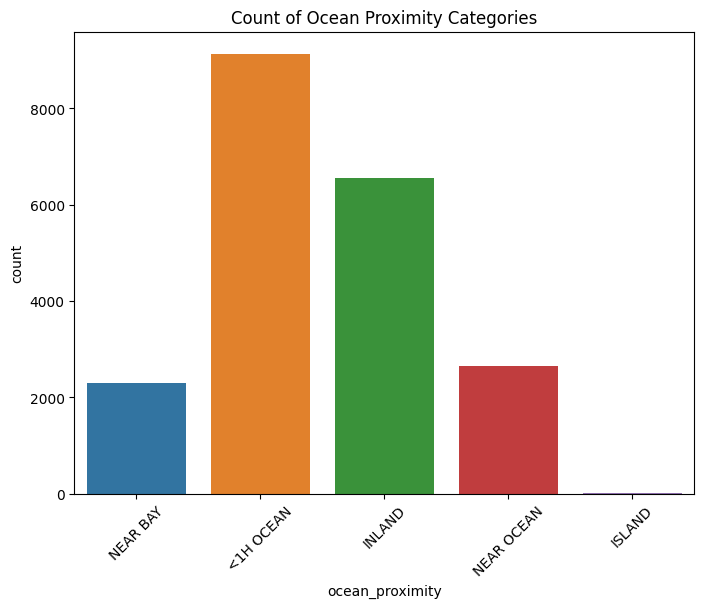

In [16]:
# Categorical feature (ocean_proximity)
plt.figure(figsize=(8, 6))
sns.countplot(x='ocean_proximity', data=df, hue='ocean_proximity')
plt.title('Count of Ocean Proximity Categories')
plt.xticks(rotation=45)

**Observation: Ocean Proximity Categories**
- The majority of houses are located "<1H OCEAN" (within one hour of the ocean) and "INLAND", indicating a mix of coastal and interior development.

- "NEAR BAY" and "NEAR OCEAN" have fewer samples, while "ISLAND" appears extremely rare(5).


## 2. Bivariate Analysis

### 2.1 scatter plot for Median Income vs. Median House Value

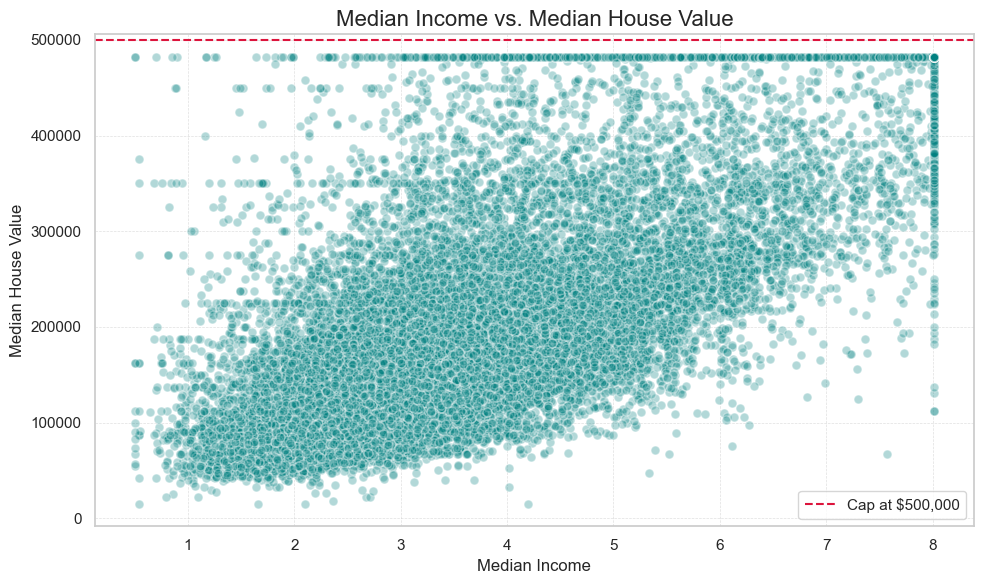

In [17]:
sns.set(style='whitegrid')

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(
    df['median_income'],
    df['median_house_value'],
    alpha=0.3,
    color='teal',
    edgecolors='white',
    s=40
)

# Title and axis labels
plt.title('Median Income vs. Median House Value', fontsize=16)
plt.xlabel('Median Income', fontsize=12)
plt.ylabel('Median House Value', fontsize=12)

# Add a horizontal line to show the capping point (optional but insightful)
plt.axhline(y=500000, color='crimson', linestyle='--', linewidth=1.5, label='Cap at $500,000')
plt.legend()

# Improve layout and visuals
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
plt.tight_layout()

# Show plot
plt.show()

**Observation: Median Income vs. Median House Value**
- A strong positive correlation is observed: higher median income areas tend to have higher median house values.

- The data points become denser and more spread out as income increases, reflecting greater housing value variability in wealthier regions.

- A horizontal boundary at $500,000 confirms the artificial cap on house prices, flattening the upper trend and possibly masking further price variation at high-income levels.

### 2.2 Barplot for average house value by ocean proximity



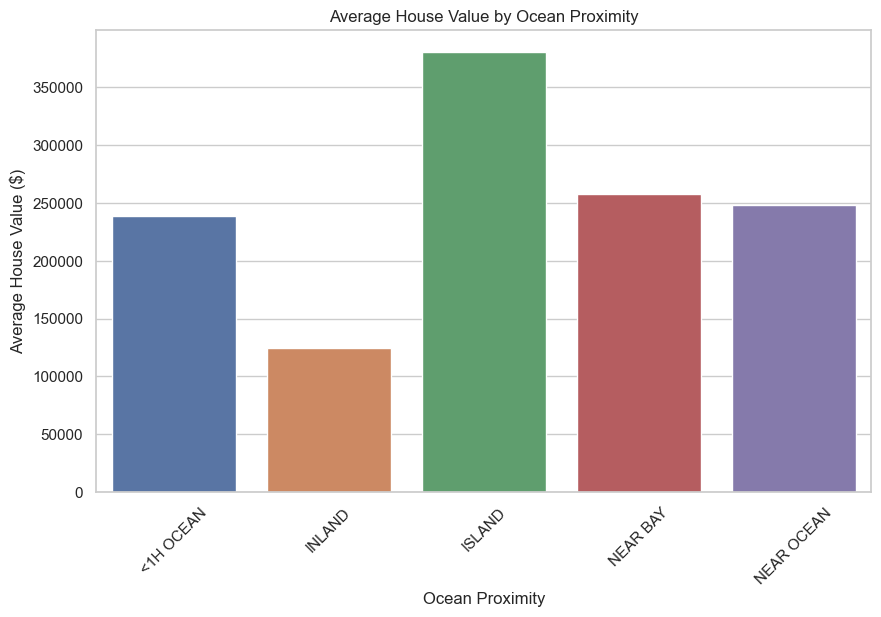

In [18]:
# Calculate average house value by ocean proximity
ocean_proximity_means = df.groupby("ocean_proximity")["median_house_value"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=ocean_proximity_means, x='ocean_proximity', y='median_house_value', hue='ocean_proximity')
plt.title('Average House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Average House Value ($)')
plt.xticks(rotation=45)
plt.show()

**Average House Value by Ocean Proximity**
- Island properties have the highest average house value, followed by Near Bay and Near Ocean categories, suggesting a premium for coastal or exclusive locations.

- Inland areas show the lowest average values, indicating a clear geographic price gradient from coast to interior.

- Properties within one hour of the ocean ("<1H OCEAN") also hold relatively high value, reinforcing the economic influence of coastal proximity.

## 3. Multivariate Analysis

### 3.1 Scatter plots for key numerical features vs. target

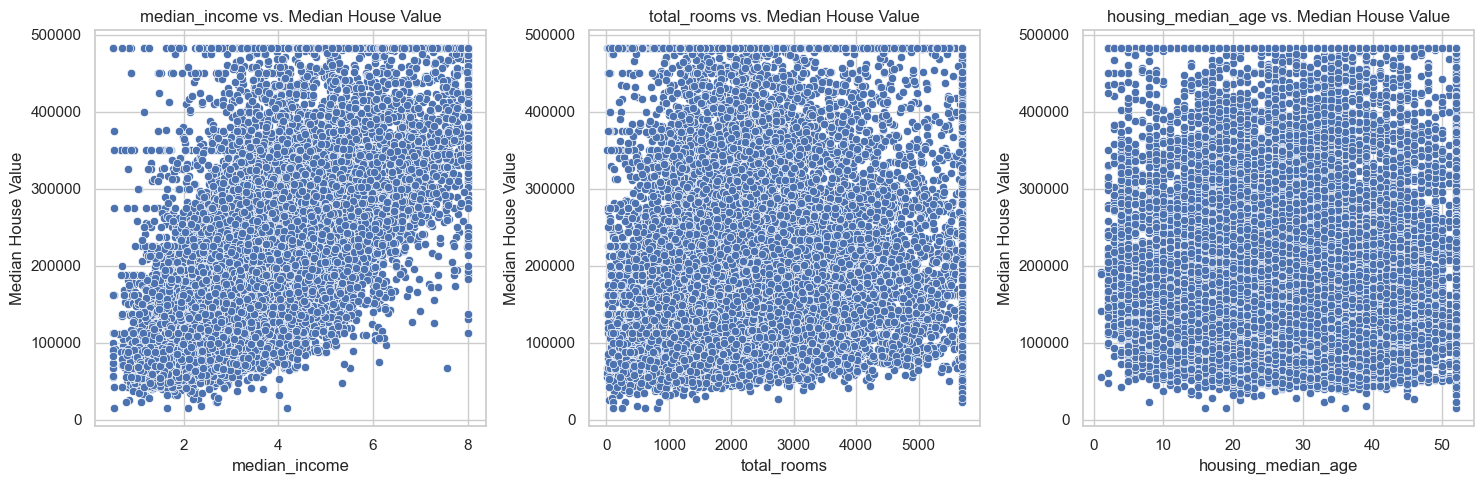

In [19]:
# Scatter plots for key numerical features vs. target (median_house_value)
key_features = ['median_income', 'total_rooms', 'housing_median_age']
plt.figure(figsize=(15, 5))
for i, col in enumerate(key_features, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=df[col], y=df['median_house_value'])
    plt.title(f'{col} vs. Median House Value')
    plt.xlabel(col)
    plt.ylabel('Median House Value')
plt.tight_layout()

**Key Features vs. Median House Value**
- Median Income: Shows a strong positive relationship with median_house_value up to the $500,000 cap, after which values plateau, indicating the cap limits visibility into high-value trends.

- Total Rooms: Displays a weak positive trend with considerable vertical spread, suggesting that room count alone is not a strong predictor of house value.

- Housing Median Age: Reveals no clear correlation with house prices; values are uniformly distributed across age groups, implying that age is not a strong standalone determinant of house value.



### 3.2 Scatterplot for Median Income vs. Median House Value by Ocean Proximity

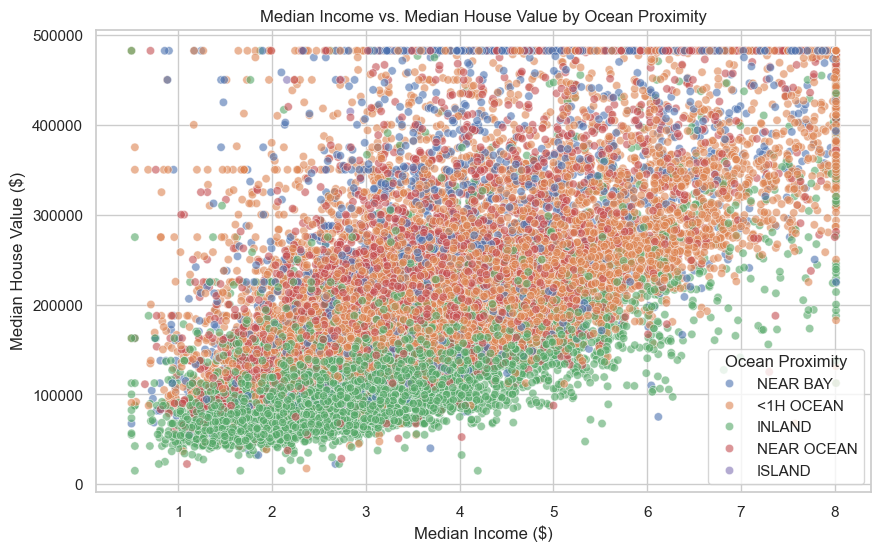

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='median_income', y='median_house_value', hue='ocean_proximity', alpha=0.6)
plt.title('Median Income vs. Median House Value by Ocean Proximity')
plt.xlabel('Median Income ($)')
plt.ylabel('Median House Value ($)')
plt.legend(title='Ocean Proximity')
plt.show()

**Observation: Median Income vs. House Value by Ocean Proximity**
- A positive correlation exists between median_income and median_house_value across all ocean proximity categories.

- Inland (green) properties consistently occupy the lower value range, even for higher incomes, indicating lower baseline pricing.

- Coastal categories such as NEAR BAY, <1H OCEAN, and NEAR OCEAN dominate the upper value range, especially near the $500,000 cap.

- The income effect on pricing is amplified in coastal regions, suggesting ocean proximity not only elevates baseline house prices but also enhances income-price sensitivity.

### 3.3 Correlation Matrix

In [21]:
corr_matrix = df.select_dtypes(include=['number']).corr()
target = 'median_house_value'

print("\nTop correlations with target:")
print(corr_matrix[target].sort_values(ascending=False))


Top correlations with target:
median_house_value    1.000000
median_income         0.689654
total_rooms           0.173622
housing_median_age    0.104423
households            0.080980
total_bedrooms        0.062042
population           -0.030735
longitude            -0.046311
latitude             -0.145494
Name: median_house_value, dtype: float64


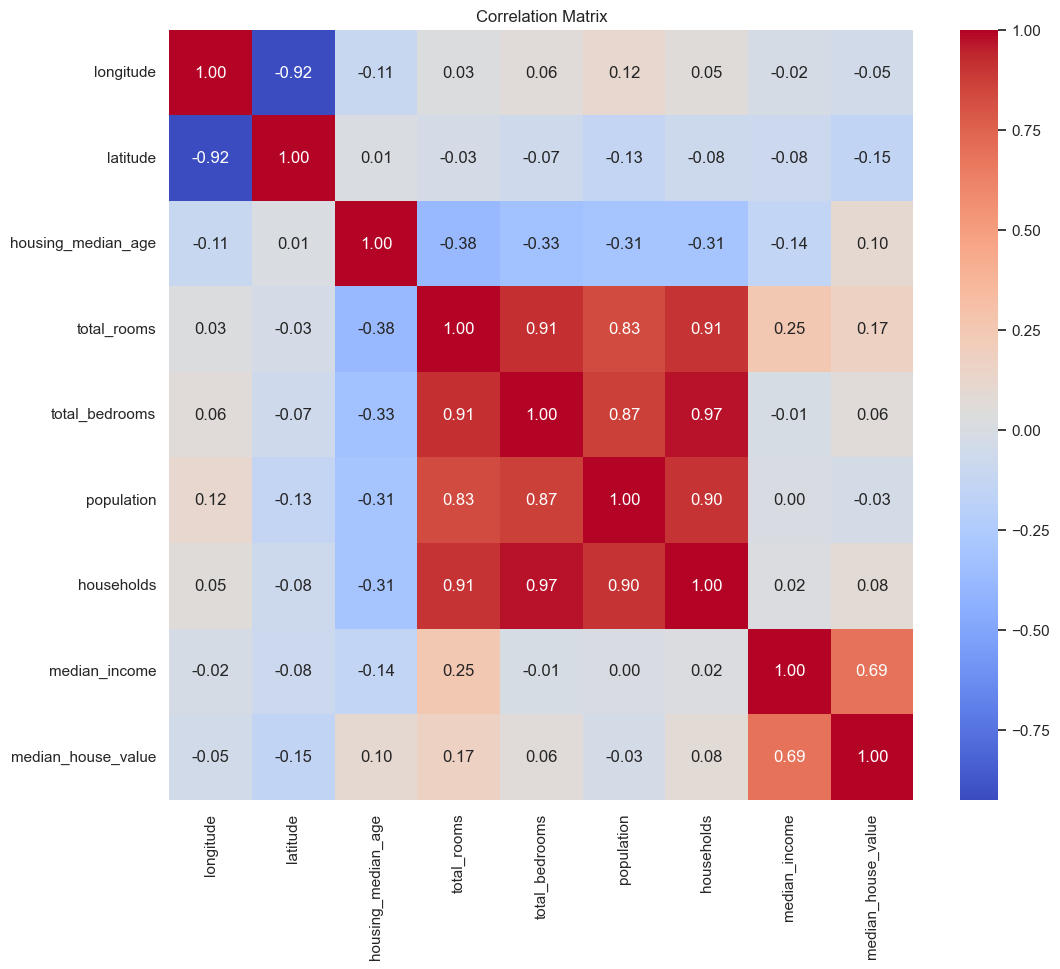

In [22]:
corr_matrix = df.select_dtypes(include=['number']).corr()
target = 'median_house_value'

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**Correlation Matrix of Numerical Features**
- Median Income shows the strongest positive correlation with median_house_value (r = 0.69), indicating income is a key driver of housing prices.

- Total_rooms, total_bedrooms, population, and households are highly correlated with each other (r > 0.85), suggesting multicollinearity.

- Geospatial features longitude and latitude are strongly negatively correlated (r = -0.92), reflecting the physical orientation of California.

- Other features such as housing_median_age and total_rooms show weak or moderate correlations with the target variable.

### 3.4 Pair plot for selected numerical features

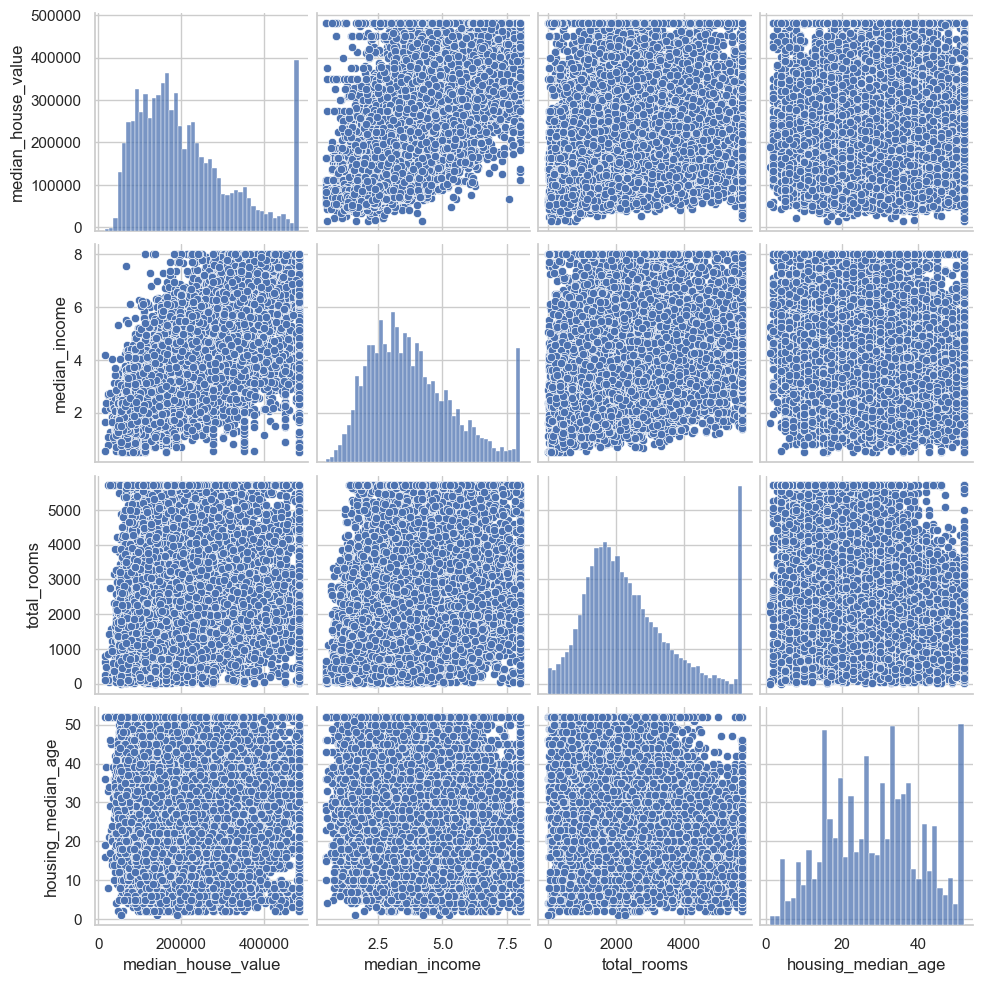

In [23]:
# Pair plot for selected numerical features
selected_cols = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
sns.pairplot(df[selected_cols].dropna())


**Pair Plot of Key Features**
- median_income vs. median_house_value: Displays a strong positive trend, confirming income as a key determinant of house prices. The upper price cap at $500,000 creates a visible horizontal ceiling effect.

- total_rooms shows no clear linear pattern with median_house_value, likely due to right skewness and large variance; transformation may be needed for better interpretability.

- housing_median_age shows no strong correlation with other variables, including the target, suggesting limited predictive power in isolation.

### 3.5 Scatter plot with hue for ocean_proximity

Text(0.5, 1.0, 'Median Income vs. Median House Value (by Ocean Proximity and Population)')

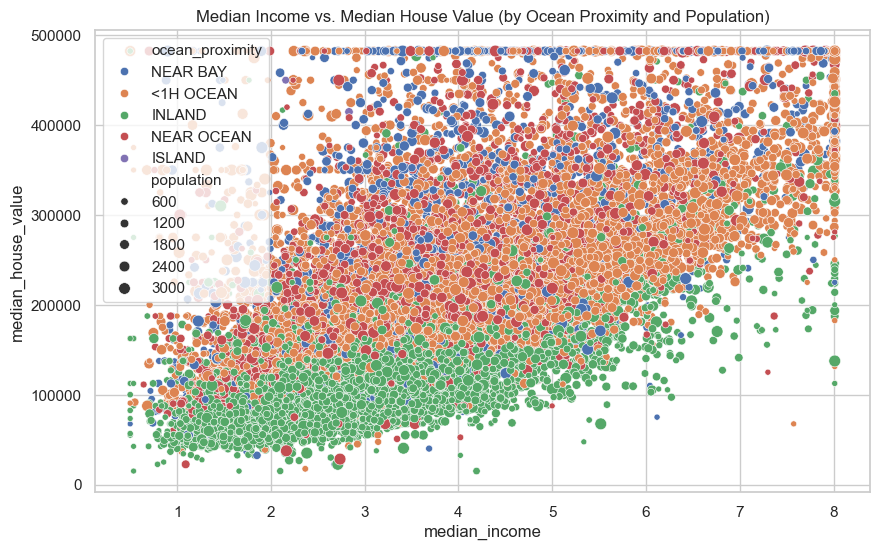

In [24]:
# Scatter plot with hue for ocean_proximity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', hue='ocean_proximity', size='population', data=df)
plt.title('Median Income vs. Median House Value (by Ocean Proximity and Population)')

**Income vs. House Value by Ocean Proximity and Population**
- A positive correlation between median_income and median_house_value persists across all ocean proximity types.

- Inland properties (green) generally cluster in the lower-left region, indicating lower income and housing values, even in densely populated areas.

- Coastal regions (<1H OCEAN, NEAR BAY, NEAR OCEAN, ISLAND) dominate the upper price bands, suggesting higher valuation of ocean-adjacent properties.

- Larger population circles appear more frequently in coastal zones with mid-to-high income, indicating demand concentration in urban coastal markets.

- The $500,000 cap flattens the upper bound across all categories.

### 3.6 Geographical Visualization (Latitude vs. Longitude)

Text(0.5, 1.0, 'Geographical Distribution of House Values')

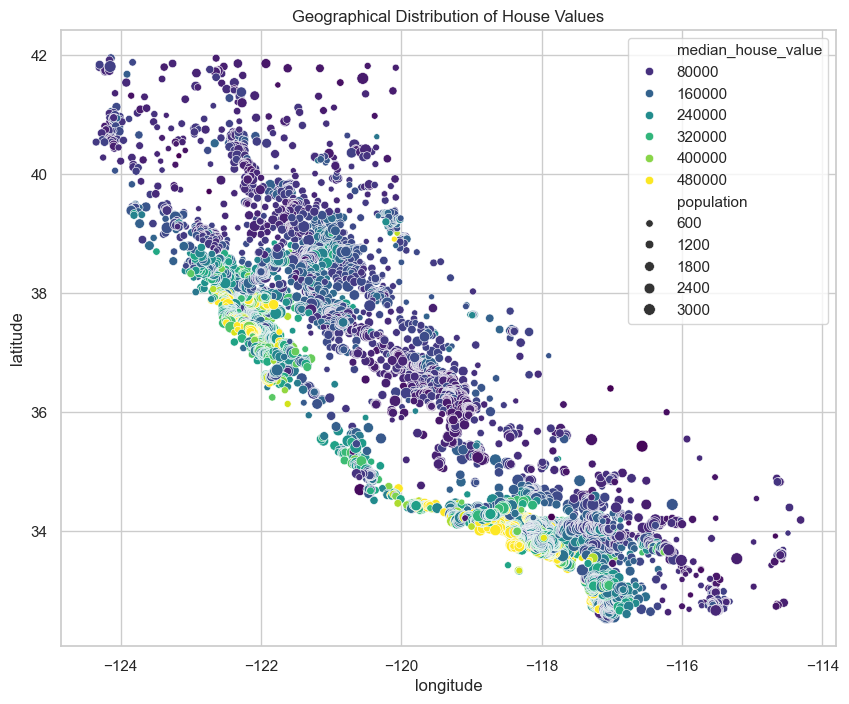

In [25]:
# 5. Geographical Visualization (Latitude vs. Longitude)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', hue='median_house_value', size='population', data=df, palette='viridis')
plt.title('Geographical Distribution of House Values')

**Geographical Distribution of House Values**
- High-value properties (yellow markers) are clustered near coastal regions, particularly around Los Angeles (south) and the Bay Area (north), indicating premium pricing in urban coastal zones.

- Lower-value properties (dark purple) are more dispersed inland and toward northern and eastern California, reflecting rural or less-developed areas.

- Higher population densities (larger dots) are concentrated in the same high-value coastal zones, showing alignment between urbanization and housing cost.

- The plot captures regional price disparity, driven by both location and population concentration, reinforcing the spatial-economic divide in California housing.

## 4. Multicollinearity Detection

In [26]:
# Preprocessing for VIF Calculation

# Select only numerical features (excluding target and non-predictive identifiers)
numerical_features = df.drop(columns=['median_house_value', 'ocean_proximity'])

# Standardize the features before calculating VIF
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numerical_features)

# Convert to DataFrame for readability
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_features.columns)


In [27]:
# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_scaled_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]

# Display VIF
vif_data.sort_values(by="VIF", ascending=False)


Feature        VIF
6          households  27.474985
4      total_bedrooms  24.023215
3         total_rooms  12.451182
1            latitude   9.434259
0           longitude   9.123738
5          population   5.891247
7       median_income   2.114401
2  housing_median_age   1.298552

**Insights and Remedial Actions**

- **Dimensional Redundancy**: `total_rooms`, `total_bedrooms`, `households`, and `population` represent closely related constructs (block size and density). This redundancy inflates their VIF values.
- **Recommended Transformation**:
  - Create derived features such as:
    - `rooms_per_household = total_rooms / households`
    - `bedrooms_per_room = total_bedrooms / total_rooms`
    - `population_per_household = population / households`
  - Drop at least two among `total_rooms`, `total_bedrooms`, `households`, and `population` to reduce redundancy.
- **Geospatial Features**:
  - VIFs for `latitude` and `longitude` indicate mild collinearity.


## 5. Feature Engineering

In [28]:
# Feature engineering: Creating new features
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

In [29]:
columns_to_drop = ['total_rooms', 'total_bedrooms', 'households', 'population'] # to reduce redundancy.
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [30]:
df.head()

longitude  latitude  housing_median_age  median_income  median_house_value  \
0    -122.23     37.88                41.0       8.013025            452600.0   
1    -122.22     37.86                21.0       8.013025            358500.0   
2    -122.24     37.85                52.0       7.257400            352100.0   
3    -122.25     37.85                52.0       5.643100            341300.0   
4    -122.25     37.85                52.0       3.846200            342200.0   

  ocean_proximity  rooms_per_household  bedrooms_per_room  \
0        NEAR BAY             6.984127           0.146591   
1        NEAR BAY             5.215904           0.194090   
2        NEAR BAY             8.288136           0.129516   
3        NEAR BAY             5.817352           0.184458   
4        NEAR BAY             6.281853           0.172096   

   population_per_household  
0                  2.555556  
1                  2.197712  
2                  2.802260  
3                  2.547945  
4                  2.181467

## 6. Data Scaling

In [31]:
# One-hot encoding of categorical variable
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# Apply Robust Scaler
numerical_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns.drop('median_house_value')
scaler = RobustScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Define features and target
X = df_encoded.drop('median_house_value', axis=1)
y = df_encoded['median_house_value']

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 7. Model Building - Decision Tree Regressor

A decision tree model is trained as a simple and interpretable baseline. Model depth is restricted to prevent overfitting. Performance metrics include RMSE, MAE, and R².


In [32]:
# 7. Model Building - Decision Tree

"""
### Decision Tree Regressor
This model is used as a simple baseline to understand tree-based predictions.
A depth limit is used to prevent overfitting.
"""
dt_model = DecisionTreeRegressor(max_depth=5,criterion='squared_error',
                              min_samples_split=2,
                              min_samples_leaf=1, random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)

print(f"Decision Tree - RMSE: {dt_rmse:.2f}, MAE: {dt_mae:.2f}, R^2: {dt_r2:.2f}")

Decision Tree - RMSE: 68445.17, MAE: 47977.34, R^2: 0.63


In [33]:
# Actual vs Predicted for Decision Tree
dt_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_dt})
print("\nDecision Tree - Actual vs Predicted Values:")
dt_results.head()


Decision Tree - Actual vs Predicted Values:


Actual      Predicted
20046   47700.0   79218.946706
3024    45800.0  102723.356009
15663  482412.5  307630.962824
20484  218600.0  301391.778774
9814   278000.0  307630.962824

In [34]:
# Define feature names from X.columns
feature_names = X.columns

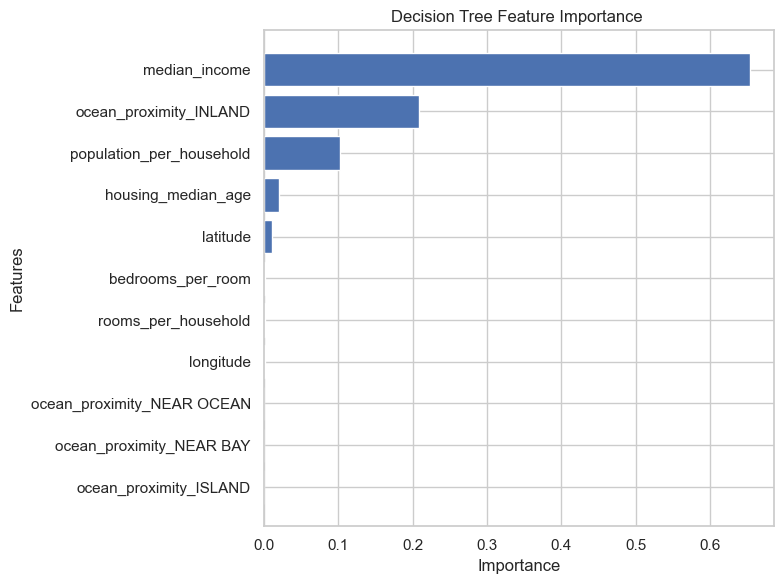

In [49]:
# 12.1 Decision Tree Feature Importance Plot
dt_importances = dt_model.feature_importances_
indices_dt = np.argsort(dt_importances)[0::]
plt.figure(figsize=(8, 6))
plt.barh(range(len(feature_names)), dt_importances[indices_dt])
plt.yticks(range(len(feature_names)), np.array(feature_names)[indices_dt])
plt.title('Decision Tree Feature Importance ')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

##  8. Model Building - Random Forest Regressor

Random Forest improves upon decision trees by aggregating predictions from multiple estimators. It is more robust and typically achieves better generalization. Performance is evaluated using standard regression metrics.


In [36]:
# 8. Model Building - Random Forest
"""
### Random Forest Regressor
This ensemble method reduces overfitting and improves performance by aggregating multiple decision trees.
"""
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"Random Forest - RMSE: {rf_rmse:.2f}, MAE: {rf_mae:.2f}, R^2: {rf_r2:.2f}")

Random Forest - RMSE: 49425.60, MAE: 31854.95, R^2: 0.81


In [37]:
# Actual vs Predicted for Random Forest
rf_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
print("\nRandom Forest - Actual vs Predicted Values:")
rf_results.head()



Random Forest - Actual vs Predicted Values:


Actual   Predicted
20046   47700.0   48464.000
3024    45800.0  117958.000
15663  482412.5  429060.875
20484  218600.0  273244.000
9814   278000.0  240068.000

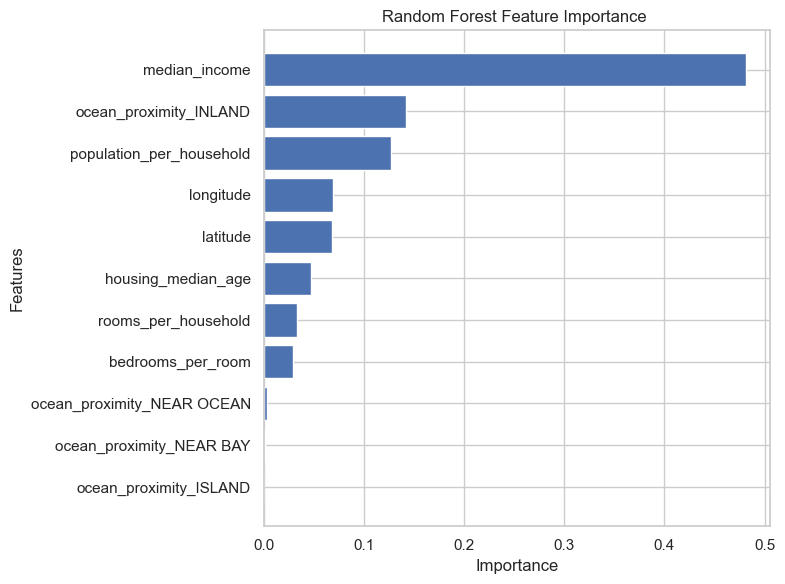

In [48]:
# 12.2 Random Forest Feature Importance Plot
rf_importances = rf_model.feature_importances_
indices_rf = np.argsort(rf_importances)[0::]
plt.figure(figsize=(8, 6))
plt.barh(range(len(feature_names)), rf_importances[indices_rf])
plt.yticks(range(len(feature_names)), np.array(feature_names)[indices_rf])
plt.title('Random Forest Feature Importance ')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

## 9. Model Building - Ridge Regression (From Scratch)

Ridge Regression is implemented using the closed-form solution with L2 regularization. This serves as a baseline linear model and is sensitive to feature scaling. It is useful for understanding the linear relationships in the data.


In [39]:
# ---
# 9. Model Building - Ridge Regression (from scratch)

"""
### Custom Ridge Regression
Implemented using closed-form solution with L2 regularization.
Suitable for assessing the impact of outliers after robust scaling.
"""
class RidgeRegression:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        X = np.asarray(X, dtype=np.float64)
        y = np.asarray(y, dtype=np.float64)
        X_with_bias = np.c_[X, np.ones(X.shape[0])]
        n_features = X_with_bias.shape[1]
        identity = np.eye(n_features)
        identity[-1, -1] = 0
        XTX = X_with_bias.T @ X_with_bias
        regularized = XTX + self.alpha * identity
        inverse = np.linalg.inv(regularized)
        coefficients = inverse @ X_with_bias.T @ y
        self.weights = coefficients[:-1]
        self.bias = coefficients[-1]
        return self

    def predict(self, X):
        X = np.asarray(X, dtype=np.float64)
        return X @ self.weights + self.bias

ridge = RidgeRegression(alpha=100.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - RMSE: {ridge_rmse:.2f}, MAE: {ridge_mae:.2f}, R^2: {ridge_r2:.2f}")

Ridge Regression - RMSE: 76393.61, MAE: 53206.85, R^2: 0.54


In [40]:
# Actual vs Predicted for Ridge Regression
ridge_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ridge})
print("\nRidge Regression - Actual vs Predicted Values:")
ridge_results.head()


Ridge Regression - Actual vs Predicted Values:


Actual      Predicted
20046   47700.0   75337.708695
3024    45800.0   90820.961108
15663  482412.5  204108.537895
20484  218600.0  281281.436294
9814   278000.0  244809.345248

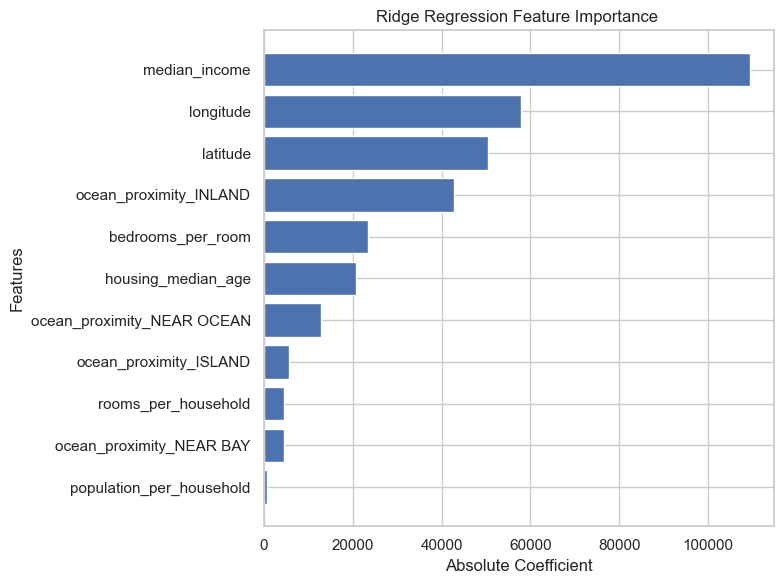

In [47]:
# 12.3 Ridge Regression Feature Importance Plot
ridge_coefficients = np.abs(ridge.weights)
indices_ridge = np.argsort(ridge_coefficients)[0::]
plt.figure(figsize=(8, 6))
plt.barh(range(len(feature_names)), ridge_coefficients[indices_ridge])
plt.yticks(range(len(feature_names)), np.array(feature_names)[indices_ridge])
plt.title('Ridge Regression Feature Importance ')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


## 10. Model Building - Gradient Boosting Regressor

In [42]:
# 11. Model Building - Gradient Boosting Regressor
"""
### Gradient Boosting Regressor
An ensemble method that optimizes predictions through iterative learning, improving upon individual trees with a focus on residuals.
"""
from sklearn.ensemble import GradientBoostingRegressor
gbt_model = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
gbt_model.fit(X_train, y_train)

y_pred_gbt = gbt_model.predict(X_test)
gbt_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gbt))
gbt_mae = mean_absolute_error(y_test, y_pred_gbt)
gbt_r2 = r2_score(y_test, y_pred_gbt)

print(f"Gradient Boosting - RMSE: {gbt_rmse:.2f}, MAE: {gbt_mae:.2f}, R^2: {gbt_r2:.2f}")



Gradient Boosting - RMSE: 49410.09, MAE: 32844.31, R^2: 0.81


In [43]:
# Actual vs Predicted for Gradient Boosting
gbt_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_gbt})
print("\nGradient Boosting - Actual vs Predicted Values:")
gbt_results.head()


Gradient Boosting - Actual vs Predicted Values:


Actual      Predicted
20046   47700.0   61596.180740
3024    45800.0   86850.506444
15663  482412.5  534096.041308
20484  218600.0  245975.279121
9814   278000.0  249471.495342

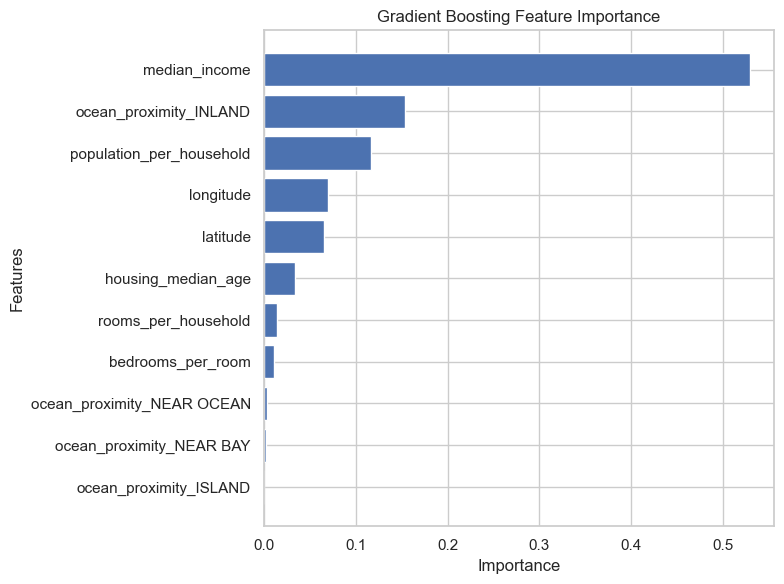

In [44]:
# Gradient Boosting Feature Importance Plot
gbt_importances = gbt_model.feature_importances_
indices_gbt = np.argsort(gbt_importances)[0::]
plt.figure(figsize=(8, 6))
plt.barh(range(len(feature_names)), gbt_importances[indices_gbt])
plt.yticks(range(len(feature_names)), np.array(feature_names)[indices_gbt])
plt.title('Gradient Boosting Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

## 11. Model Comparison

RMSE, MAE, and R² metrics are calculated for all models and compiled into a comparison table. A bar plot is used to visually compare the error metric (R² Score) across models.


In [45]:
# 10. Model Comparison and Visualization
"""
### Model Comparison
Compare all four models using RMSE, MAE, and R^2 to assess their performance.
"""
results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Ridge Regression', 'Gradient Boosting'],
    'RMSE': [dt_rmse, rf_rmse, ridge_rmse, gbt_rmse],
    'MAE': [dt_mae, rf_mae, ridge_mae, gbt_mae],
    'R^2': [dt_r2, rf_r2, ridge_r2, gbt_r2]
})

print("\nModel Comparison:")
results


Model Comparison:


Model          RMSE           MAE       R^2
0      Decision Tree  68445.174158  47977.343153  0.629476
1      Random Forest  49425.604917  31854.954954  0.806788
2   Ridge Regression  76393.608013  53206.851703  0.538423
3  Gradient Boosting  49410.089310  32844.310883  0.806909

### 12 R² Only Comparison

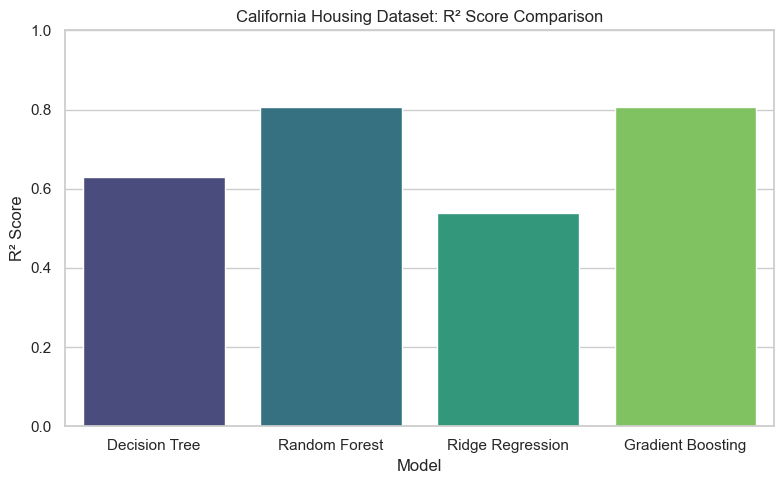

In [46]:
"""
Displays R² scores for each model.
"""
r2_only = results[['Model', 'R^2']].copy()
plt.figure(figsize=(8, 5))
sns.barplot(data=r2_only, x='Model', y='R^2', hue='Model', palette='viridis')
plt.title('California Housing Dataset: R² Score Comparison')
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

### Observations and Conclusion

#### Observations
- **Random Forest** and **Gradient Boosting** both excel, with Gradient Boosting slightly edging out with the lowest RMSE (49,410.09) and highest R² (0.8069), followed closely by Random Forest (RMSE 49,425.60, R² 0.8068). Their performance highlights the strength of ensemble methods in capturing complex, non-linear patterns.
- **Decision Tree** shows moderate performance with an R² of 0.6295, but its higher RMSE (68,445.17) and MAE (47,977.34) suggest sensitivity to data variance and limited generalization.
- **Ridge Regression** underperforms with the lowest R² (0.5384) and highest RMSE (76,393.61) and MAE (53,206.85), reflecting the limitations of linear models on this spatially heterogeneous dataset.

#### Conclusion
**Gradient Boosting** is the optimal model, offering the best accuracy (R² 0.8069) and lowest RMSE (49,410.09), making it ideal for deployment. **Random Forest** is a strong alternative with nearly identical performance (R² 0.8068), suitable for robustness. **Decision Tree** serves as a baseline, while **Ridge Regression** remains a linear benchmark with limited predictive power.